In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [3]:
df_ice_cream=pd.read_csv("ice_cream.csv")

In [4]:
df_ice_cream.head()

,DATE,IPN31152N
0,1/1/1972,59.9622
1,2/1/1972,67.0605
2,3/1/1972,74.2350
3,4/1/1972,78.1120
4,5/1/1972,84.7636


In [5]:
#rename columns to something more understandable
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [6]:
#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [7]:
#set date as index
df_ice_cream.set_index('date', inplace=True)

In [8]:
#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [9]:
#show result
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


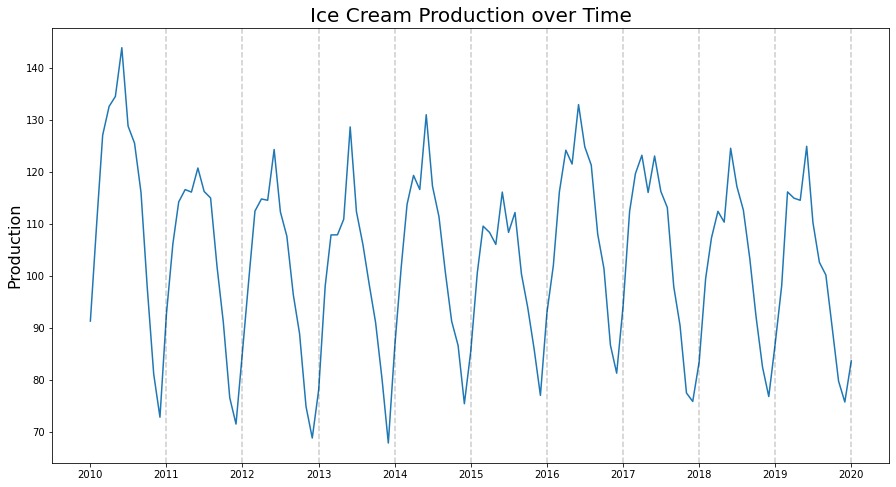

In [10]:
plt.figure(figsize=(15,8))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF

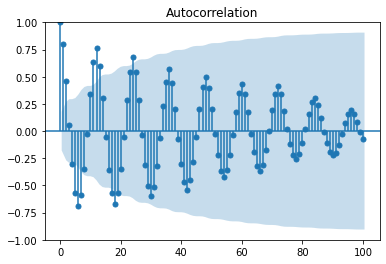

In [11]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

# Based on decaying ACF, we are likely dealing with an Auto Regressive process

# PACF

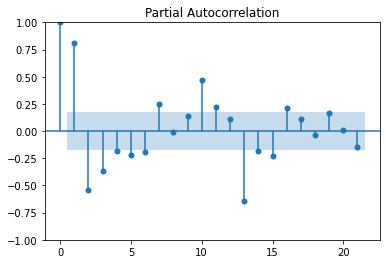

In [12]:
pacf_plot = plot_pacf(df_ice_cream.production)

# Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

# On stock data

In [13]:
import yfinance as yf

In [14]:
tickerSymbol = "SPY"

In [15]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [16]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period="1D",start = "2015-1-1",end = "2020-1-1")

In [17]:
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-12-31,181.241620,181.415896,178.975985,179.106689,130333800,0.0,0
2015-01-02,179.838686,180.274384,177.921604,179.010849,121465900,0.0,0
2015-01-05,177.912887,178.087163,175.455557,175.777969,169632600,0.0,0
2015-01-06,176.100389,176.649372,173.285784,174.122330,209151400,0.0,0
2015-01-07,175.516588,176.649405,175.046040,176.292130,125346700,0.0,0
...,...,...,...,...,...,...,...
2019-12-24,309.125642,309.173710,308.577522,308.894867,20270000,0.0,0
2019-12-26,309.298682,310.548779,309.289086,310.539154,30911200,0.0,0
2019-12-27,311.308432,311.366126,309.904504,310.462219,42528800,0.0,0


In [18]:
tickerDf=tickerDf[["Close"]]

In [19]:
tickerDf

,Close
Date,
2014-12-31,179.106689
2015-01-02,179.010849
2015-01-05,175.777969
2015-01-06,174.122330
2015-01-07,176.292130
...,...
2019-12-24,308.894867
2019-12-26,310.539154
2019-12-27,310.462219


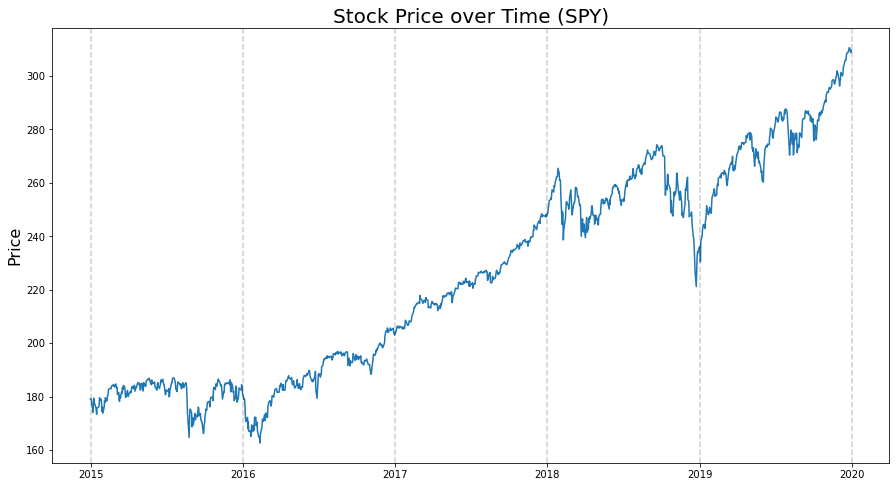

In [20]:
plt.figure(figsize=(15,8))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# Stationarity: take first difference of this series

In [21]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]

In [22]:
first_diffs

array([-0.09584045, -3.23287964, -1.65563965, ..., -0.07693481,
       -1.71166992,  0.75006104])

In [ ]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [23]:
first_diffs = np.concatenate([first_diffs, [0]])

In [24]:
first_diffs

array([-0.09584045, -3.23287964, -1.65563965, ..., -1.71166992,
        0.75006104,  0.        ])

In [25]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

In [26]:
tickerDf.head()

,Close,FirstDifference
Date,,
2014-12-31,179.106689,-0.095840
2015-01-02,179.010849,-3.232880
2015-01-05,175.777969,-1.655640
2015-01-06,174.122330,2.169800
2015-01-07,176.292130,3.128281


In [27]:
tickerDf.tail()

,Close,FirstDifference
Date,,
2019-12-24,308.894867,1.644287
2019-12-26,310.539154,-0.076935
2019-12-27,310.462219,-1.711670
2019-12-30,308.750549,0.750061
2019-12-31,309.500610,0.000000


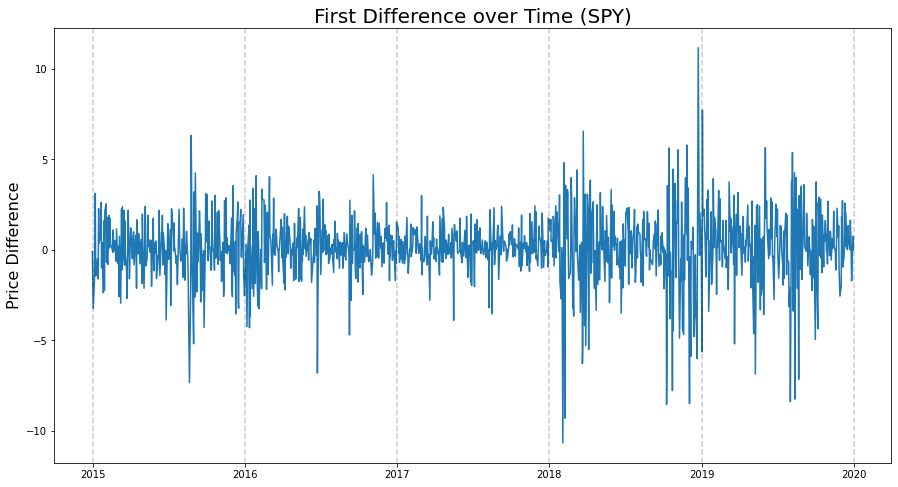

In [28]:
plt.figure(figsize=(15,8))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

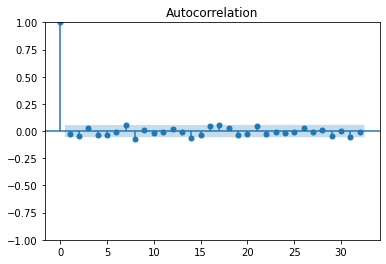

In [30]:
acf_plot = plot_acf(tickerDf.FirstDifference)

# ACF isn't that informative

# PACF

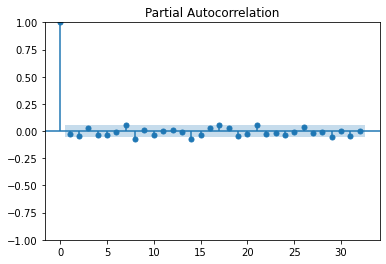

In [31]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

# PACF doesnot tell us much